In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
b = pd.read_csv('test.csv')

In [9]:
b.shape

(1459, 80)

In [10]:
b.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [11]:
b.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [12]:
b.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu       730
GarageType         76
GarageYrBlt        78
GarageFinish       78
GarageCars          1
GarageArea          1
GarageQual         78
GarageCond

In [13]:
b.drop(['Alley'],axis=1,inplace=True)
b.drop(['PoolQC'],axis=1,inplace=True)
b.drop(['Fence'],axis=1,inplace=True)
b.drop(['MiscFeature'],axis=1,inplace=True)
b.drop(['GarageYrBlt'],axis=1,inplace=True)
b.drop(['Id'],axis=1,inplace=True)

In [14]:
b.shape

(1459, 74)

In [15]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 74 columns):
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-null object
Exterior2nd      1458 non-null object
MasVnrType       1443 no

In [16]:
#check the type of values in column MSZoning which is object type
b['MSZoning'].value_counts()

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

In [17]:
#replace MSZoning null value with mode of column
#use mode for object data type and mean for integer datatype
b['MSZoning']=b['MSZoning'].fillna(b['MSZoning'].mode()[0])

In [18]:
b['MSZoning'].value_counts()

RL         1118
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

In [19]:
b['LotFrontage']=b['LotFrontage'].fillna(b['LotFrontage'].mean())
b['BsmtCond']=b['BsmtCond'].fillna(b['BsmtCond'].mode()[0])
b['BsmtQual']=b['BsmtQual'].fillna(b['BsmtQual'].mode()[0])
b['FireplaceQu']=b['FireplaceQu'].fillna(b['FireplaceQu'].mode()[0])
b['GarageType']=b['GarageType'].fillna(b['GarageType'].mode()[0])
b['GarageFinish']=b['GarageFinish'].fillna(b['GarageFinish'].mode()[0])
b['GarageQual']=b['GarageQual'].fillna(b['GarageQual'].mode()[0])
b['GarageCond']=b['GarageCond'].fillna(b['GarageCond'].mode()[0])
b['MasVnrType']=b['MasVnrType'].fillna(b['MasVnrType'].mode()[0])
b['MasVnrArea']=b['MasVnrArea'].fillna(b['MasVnrArea'].mode()[0])
b['SaleType']=b['SaleType'].fillna(b['SaleType'].mode()[0])
b['BsmtExposure']=b['BsmtExposure'].fillna(b['BsmtExposure'].mode()[0])
b['BsmtFinType2']=b['BsmtFinType2'].fillna(b['BsmtFinType2'].mode()[0])
b['Utilities']=b['Utilities'].fillna(b['Utilities'].mode()[0])
b['Exterior1st']=b['Exterior1st'].fillna(b['Exterior1st'].mode()[0])
b['Exterior2nd']=b['Exterior2nd'].fillna(b['Exterior2nd'].mode()[0])
b['BsmtFullBath']=b['BsmtFullBath'].fillna(b['BsmtFullBath'].mean())
b['BsmtHalfBath']=b['BsmtHalfBath'].fillna(b['BsmtHalfBath'].mean())
b['GarageCars']=b['GarageCars'].fillna(b['GarageCars'].mean())
b['GarageArea']=b['GarageArea'].fillna(b['GarageArea'].mean())
b['KitchenQual']=b['KitchenQual'].fillna(b['KitchenQual'].mode()[0])
b['Functional']=b['Functional'].fillna(b['Functional'].mode()[0])

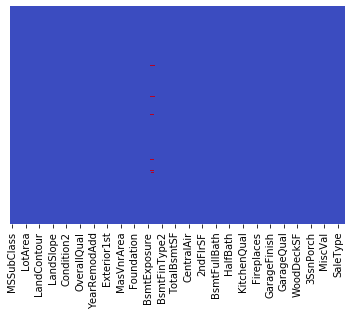

In [20]:
import seaborn as sns
sns.heatmap(b.isnull(), yticklabels=False,cbar=False,cmap='coolwarm')

In [21]:
b.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
                ..
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorc

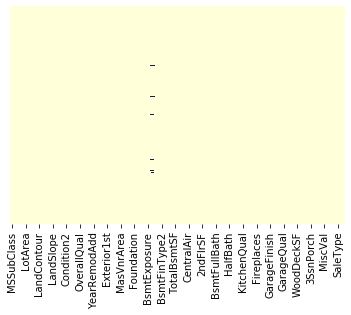

In [22]:
sns.heatmap(b.isnull(), yticklabels=False,cbar=False,cmap='YlGnBu')

In [23]:
b.shape

(1459, 74)

In [24]:
b.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
                ..
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorc

In [25]:
#drop the records having null values (rows)
#b.dropna(inplace=True)

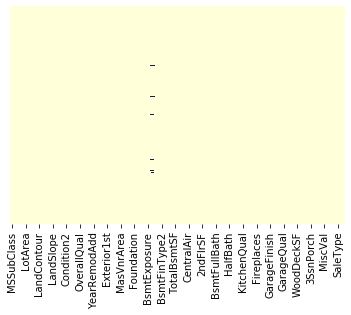

In [26]:
sns.heatmap(b.isnull(), yticklabels=False,cbar=False,cmap='YlGnBu')

In [27]:
#convert categorial fields through get dummies command in dataset variable
#datasetb = pd.get_dummies(b, columns = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',                                        'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 
 #                                      'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',                                        'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 
  #                                     'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
   #                                    'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 
    #                                   'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
     #                                  'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'])  


In [28]:
b.to_csv('testb.csv', index=False)

In [29]:
b.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,32,0,0,0,0,700,7,2006,WD,Normal
1458,60,RL,74.0,9627,Pave,Reg,Lvl,AllPub,Inside,Mod,...,48,0,0,0,0,0,11,2006,WD,Normal
